<a href="https://colab.research.google.com/github/kassio077/Aprendizado-de-maquina/blob/master/Atividade_3_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando dodos de detecção de intrusão na rede com Redes Neurais Artificiais

O Dataset consiste em informações de um ambiente simulado de ataques a uma LAN (Network de Área Local) Militar. A base de dados é composta por 42 atributos e 25192 instâncias que estão classificadas como:


1.   anormaly
2.   normal

Os atributos descrevem se uma conexão representa ou não um ataque de intruso a rede.

Link para o dataset: [link text](https://www.kaggle.com/sampadab17/network-intrusion-detection?select=Train_data.csv)

# 1. Carregando os dados

In [2]:
from google.colab import drive

import numpy as np
import pandas as pd

dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Train_data.csv')

dados.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# 2. Limpeza e organização dos dados

* Alguns atributos não estão contribuindo para a classificação, pois estão com valores comuns para as instâncias. Por isso aplicamos a remoção de alguns deles.

* O atributo que representa a classificação foi transformado em numérico para ser utilizado em algumas técnicas de análise.

* O atributo **service** foi removido porque apresentava valores muito específicos para cada instância.

In [3]:
#Remoção dos atributos
dados = dados.drop(columns=['service','land','wrong_fragment','urgent','hot','num_failed_logins',
                            'num_compromised','root_shell','su_attempted','num_root',
                            'num_file_creations','num_shells','num_access_files',
                            'num_outbound_cmds','is_host_login','is_guest_login'])

#Transformando o atributo categorico em numérico.
dados['class'] = dados['class'].replace(['anomaly','normal'],[1,0])

dados['protocol_type'] = dados['protocol_type'].replace(['tcp','udp','icmp'],['001','010','100'])
dados['flag'] = dados['flag'].replace(['SF','S0','REJ','RSTR','SH','RSTO','S1','RSTOS0','S3','S2','OTH'],
                                      ['0001','0010','0100','1000','1111','0011','0110','0101','1100','1110','0111'])

# 3. Preparação dos dados para o classificador

* Normalizando os atributos numéricos, através da re-escala usando máximo e mínimo.

In [4]:
dados['duration'] = dados['duration']/dados['duration'].max()

atributos_categoricos = dados.iloc[:,0:3]

#Dataframe apenas com as colunas de atributos numéricos.
atributos_numericos = dados.iloc[:,3:25] 
#Aplicando a re-escala.
atributos_numericos = (atributos_numericos - atributos_numericos.min())/(atributos_numericos.max()-atributos_numericos.min())

atributos_numericos.head(100)

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.029675e-06,0.000064,1.0,0.000000,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.952941,0.466667,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00
96,2.672192e-07,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.027451,0.003922,0.14,0.29,0.14,0.00,0.00,0.00,0.00,0.00
97,6.785272e-07,0.000146,1.0,0.005882,0.007843,0.0,0.0,0.0,0.0,1.00,0.00,0.40,0.015686,1.000000,1.00,0.00,0.25,0.03,0.00,0.00,0.00,0.00
98,3.851100e-07,0.000020,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.007843,0.01,0.42,0.86,0.00,0.00,0.00,0.00,0.00


* Separando os atributos descritores do atributo classificador.

In [5]:
#Subconjunto dos atributos descritores
atributos_descritores = pd.merge(atributos_categoricos,atributos_numericos, left_index=True, right_index=True)
atributos_descritores.head(10)

,duration,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,001,0001,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,010,0001,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,001,0010,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,001,0001,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,001,0001,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.0,001,0100,0.000000e+00,0.000000,0.0,0.235294,0.035294,0.0,0.0,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0.0,001,0010,0.000000e+00,0.000000,0.0,0.323529,0.015686,1.0,1.0,0.0,0.0,0.05,0.06,0.00,1.000000,0.035294,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0.0,001,0010,0.000000e+00,0.000000,0.0,0.227451,0.029412,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.058824,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0.0,001,0010,0.000000e+00,0.000000,0.0,0.527451,0.043137,1.0,1.0,0.0,0.0,0.09,0.05,0.00,1.000000,0.090196,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0.0,001,0010,0.000000e+00,0.000000,0.0,0.258824,0.013725,1.0,1.0,0.0,0.0,0.06,0.06,0.00,1.000000,0.050980,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [6]:
#Subconjunto do atributo class
atributo_classificador = dados['class']
atributo_classificador.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

* Aplicando os subconjuntos de dados para treino e teste do classificador.

In [7]:
from sklearn.model_selection import train_test_split

dados_descritores_train, dados_descritores_test,dados_classificador_train, dados_classificador_test = train_test_split(atributos_descritores,atributo_classificador, test_size=0.2)#random_state=42

#Subconjunto das instâncias com atributos descritores para Treino
dados_descritores_train.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
223,0.0,001,0010,0.000000e+00,0.000000,0.0,0.480392,0.037255,1.0,1.0,0.0,0.0,0.08,0.06,0.0,1.000000,0.078431,0.08,0.07,0.00,0.00,1.0,1.0,0.0,0.0
2527,0.0,001,0010,0.000000e+00,0.000000,0.0,0.439216,0.001961,1.0,1.0,0.0,0.0,0.01,0.07,0.0,1.000000,0.011765,0.01,0.08,0.00,0.00,1.0,1.0,0.0,0.0
18950,0.0,001,0001,1.991045e-06,0.000065,1.0,0.000000,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,1.0,0.631373,0.607843,0.83,0.03,0.01,0.01,0.0,0.0,0.0,0.0
22728,0.0,001,0010,0.000000e+00,0.000000,0.0,0.003922,0.003922,1.0,1.0,0.0,0.0,1.00,0.00,0.0,1.000000,0.011765,0.01,0.08,0.00,0.00,1.0,1.0,0.0,0.0
23675,0.0,001,0001,8.750119e-07,0.000000,1.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.023529,0.039216,1.00,0.00,1.00,0.20,0.0,0.0,0.0,0.0


In [8]:
#Valores das instâncias com atributo classificador para treino
dados_classificador_train.head()

223      1
2527     1
18950    0
22728    1
23675    1
Name: class, dtype: int64

# 4. Definindo o algoritmo de classificação

A partir do conjunto de dados gerados para treinar o classificador utilizando uma Rede Neural Multi-Layer Perceptron(MLP), foi determinado alguns parâmetros para a Rede Neural que consistirá em:
* Número de neurônios por camada = 100
* Função de ativação = logistic
* Número de interações = 1000





In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [11]:
#treinando modelo
classificador.fit(dados_descritores_train,dados_classificador_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
#realizando classificação
classificacao = classificador.predict(dados_descritores_test)
classificacao

array([1, 0, 1, ..., 1, 1, 1])

# 5. Avaliando o classificador

Para o dataset em questão temos como valor para o atributo alvo: anormaly (**positivo**) e normal (**negativo**). Eles representam a classificação das instâncias, como uma comunicação **anormaly** (1) ou **normal** (0).

* Métrica da acurácia

Como os dados estão razoavelmente balanceados a métrica da acurácia corresponderá um resultado mais preciso. Após aplica-lá aos dados, o classificador obteve 97% das instâncias de teste classificadas corretamente.

In [13]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [14]:
acuracia = accuracy_score(dados_classificador_test,classificacao)
acuracia

0.9805516967652312

* Métrica da precisão

Se uma instância do dataset representa uma comunicação a rede LAN como sendo uma comunicação (negativa) normal e o classificador predizer como uma instância (positiva) anomaly, representando um ataque de intrusão. Isso irá representar uma situação de falso positivo. Se for considerado como um cenário prejudicial a rede LAN, a escolha desta métrica é recomendada.

O resultado do calculo da métrica é um bom resultado caso este cenário seja mais prejudicial, pois representa a porcentagem de instâncias classificadas como positivas que são relmente positivas:

In [15]:
#calculando precisão
from sklearn.metrics import precision_score

In [16]:
precisao = precision_score(dados_classificador_test,classificacao)
precisao

0.9846808510638297

* Métrica da recall

Para uma instância que representa um ataque de intrusão (positivo) anomaly ser considerado pela função de classificação como uma comunicação (negativo) normal, pode trazer sérios problemas a rede LAN. Por isso a métrica da recall é mais recomendada para análise do classificador.

A porcentagem de acerto usando esta métrica revela uma taxa de instâncias positivas classificadas corretamente menor, se compararmos com a metrica de precisão, consequentemente um número maior de erros de falso negativo.

In [17]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [18]:
recall = recall_score(dados_classificador_test,classificacao)
recall

0.9739057239057239

* Metrica F1-score
Para acharmos uma média entre a taxa da precisão e recall, utilizamos a metrica F1-score. Seu resultado mostrou que ouve um bom balanceamento: 

In [19]:
#calculando f1-score
from sklearn.metrics import f1_score

In [20]:
f1 = f1_score(dados_classificador_test,classificacao)
f1

0.9792636479052053

* **Curva  ROC**

Utilizando a curva ROC podemos visualizar melhor a razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR).

In [21]:
#plotando curva roc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [22]:
fpr, tpr, _ = roc_curve(dados_classificador_test,classificacao)


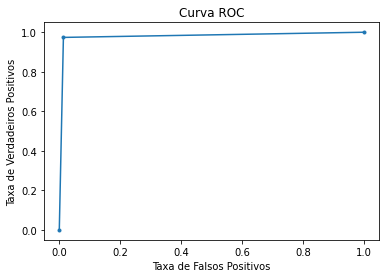

In [23]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

* **Área sob a curva**

Como tínhamos verificado com a metrica recall **taxa de verdadeiros positivos** a curva ROC mostra de forma gráfica a curva mais próximo de 1 no eixo y, em relação a **taxa de falsos positivos** eixo x. Confirmando um número maior de instâncias classificadas como verdadeiros positivos. O resultado desta área é calculado a seguir:

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
#calculando area sob a curva ROC
auc = roc_auc_score(dados_classificador_test,classificacao)
round(auc,3)

0.98

* **Validação cruzada**

Como os dados para as métricas anteriores utilizadas foram aleatorizados pela divisão do dataset, não podemos afirmar com certeza a qualidade deste modelo de classificador para novas instâncias que surgirem. Por isso utilizamos a validação cruzada para avaliar um número maior de subconjuntos de dados do dataset.



In [26]:
#avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [27]:
#definindo um novo classificador
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

A partir de 10 subconjuntos de dados do dataset foram treinados e criados os respectivos modelos de classificador, e avaliados cada um deles com um subconjunto de teste a partir da métrica da acurácia. Cada score representa a taxa de acerto de cada um deles.

A média da taxa de acerto de cada modelo classificador foi de 98%.

In [28]:
#calculando os scores
scores = cross_val_score(classificador,atributos_descritores,atributo_classificador,cv=10)
scores

array([0.98452381, 0.98055556, 0.98173879, 0.98570861, 0.97816594,
       0.98570861, 0.98054784, 0.97379913, 0.98292973, 0.98253275])

In [29]:
#média taxa de acerto e desvio padrão
round(scores.mean(),3),round(scores.std(),3)

(0.982, 0.003)

# 6.Comparando MLP com Árvore de decisão e Random Forest

* **Utilizando Validação Cruzado como método de avaliação**


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

* Árvore de decisão

In [31]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,atributos_descritores,atributo_classificador,cv=10)

* Random forest

In [32]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,atributos_descritores,atributo_classificador,cv=10)

* Comparando os resultados

Os resultados mostraram pequenas diferenças de performance para os diferentes algoritmos de classificação. A MLP saiu com a menor porcentagem comparado aos outros classificadores, no entanto, é uma taxa satisfatória.

In [33]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores_floresta.mean(),3),round(scores.std(),3))
print('MLP:', round(scores.mean(),3),round(scores.std(),3))

Árvore de Decisão:  0.993 0.001
Random Forest:  0.996 0.003
MLP: 0.982 0.003


# 7. Otimizando Parâmetros
Foram configurados alguns parâmetros para determinar um espaço de busca, e com isso, tentar achar uma melhor performance para a MLP. Estes parâmetros indicam o número de camadas escondidas da MLP e quantidade de neurônios por camada, função de ativação, algoritmo de otimização, e número de interações.

* **Random search**

In [34]:
from sklearn.model_selection import RandomizedSearchCV


In [35]:
#Parâmetros pré-configurados do espaço de busca
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(30),(80),(50,20),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [36]:
#Sorteando os modelos do espaço de busca
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')


In [37]:
#Treinando os modelos
mlp.fit(atributos_descritores,atributo_classificador)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

* Melhor configuração sorteada

A partir do espaço de busca e a métrica escolhida, o Random search sorteou algumas combinações de parâmetros e retornou a melhor configuração para os seguintes parâmetros:

1.   Algoritmo de otimização: adam
2.   Número de interações: 1000
3.   Camadas escondidas: (100, 50) 
4.   Função de ativação: logistic





In [38]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (100, 50), 'activation': 'logistic'}


Taxa da melhor configuração avaliada pela métrica da acuracia foi de 98%:

In [39]:
print(round(mlp.best_score_,3))

0.981


* **Grid search**

In [40]:
from sklearn.model_selection import GridSearchCV

Para o grid search foram executados todas as combinações do espaço de busca com os parâmetros pré-configurados e a métrica da acurácia como avaliador. 

In [41]:
#Definindo o espaço de busca para os modelos
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [42]:
#Treinando os modelos
mlp.fit(atributos_descritores,atributo_classificador)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

* Resultados do grid search

Alguns modelos não convergiram para um determinado número de interações. Em relação ao radom search, a taxa de acerto foi praticamente igual. Já os parâmetros do melhor modelo, houve diferenças como a função de ativação e o número de interações. 

In [43]:
#Melhor combinação de parametros
print(mlp.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'max_iter': 500, 'solver': 'adam'}


In [44]:
#Taxa de acerto do melhor modelo
print(mlp.best_score_)

0.985749455162791
